In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [2]:
data_path = 'CW_Data.xlsx'  # Replace with the correct path to your Excel file
data = pd.read_excel(data_path)

#
categories = data.iloc[:, 2]  # This selects the second column for categories
# features = data.iloc[:,3:]
features = data.drop(columns=['Index', 'Programme'])

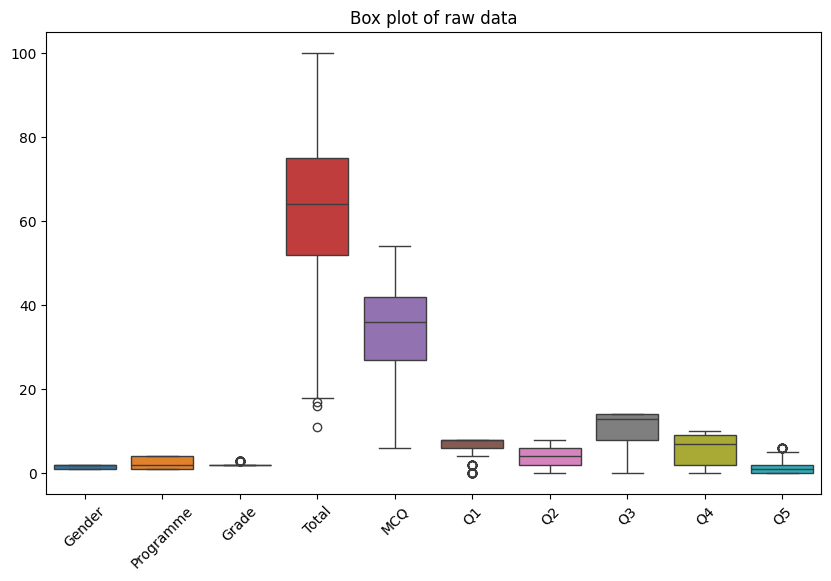

In [3]:
# 原始数据
df_plot = data.drop(columns=['Index'])
import seaborn as sns
# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot)
plt.title('Box plot of raw data')
plt.xticks(rotation=45)
plt.show()

In [4]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# continuous_columns = ['Total', 'MCQ',  'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# # 假设 df 是你的DataFrame，并且它已经包含了你想要分析的数值特征
# # 计算特征之间的相关性矩阵
# correlation_matrix = df_plot[continuous_columns].corr()

# # 使用 Seaborn 绘制热力图
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# # 显示图表的标题
# plt.title('Feature Correlation Heatmap')

# # 显示图表
# plt.show()

In [5]:
# df_cul = pd.DataFrame(data)

# # 连续变量列名
# continuous_columns = ['Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# # 计算四分位距
# iqr = df_cul[continuous_columns].quantile(0.75) - df_cul[continuous_columns].quantile(0.25)

# # 计算标准差
# std_dev = df_cul[continuous_columns].std()

# # 创建一个新的DataFrame来展示这些统计数据
# stats_df = pd.DataFrame({
#     'IQR': iqr,
#     'Standard Deviation': std_dev
# })

# # 显示统计结果
# print(stats_df)

In [6]:
# 连续变量列名
continuous_columns = ['Total', 'MCQ',  'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# 计算连续变量的Z-score
z_scores = np.abs(stats.zscore(data[continuous_columns]))

# 设置阈值
threshold = 3

# 找出异常值（Z-score大于阈值的）
outliers = (z_scores > threshold).any(axis=1)

# 删除包含异常值的行
data_no_outliers = data[~outliers]

# 更新特征和标签数据
# 假设标签在第三列
categories = data_no_outliers.iloc[:, 2]
features = data_no_outliers[ ['Grade','Gender']+continuous_columns]

# # 现在你有了清理后的特征和标签
# print(features)

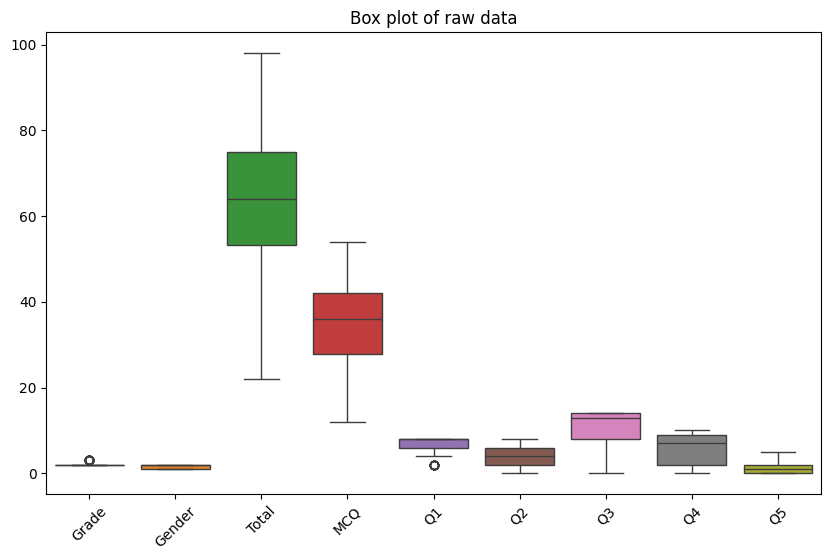

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box plot of raw data')
plt.xticks(rotation=45)
plt.show()

In [8]:
#检验原始数据是否正态分布
from scipy.stats import shapiro, normaltest
# 假设df是你的DataFrame
features['Total_Q'] = features[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].sum(axis=1)
df_f = pd.DataFrame(features)

# # 使用Shapiro-Wilk测试检验正态性
# print("Shapiro-Wilk Test Results:")
# for column in df_f.columns:
#     stat, p = shapiro(df_f[column])
#     print(f"{column}: Statistics={stat:.3f}, p={p:.4f}")
    

C:\Users\张家豪\AppData\Local\Temp\ipykernel_28208\3009436485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Total_Q'] = features[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].sum(axis=1)


In [9]:
# # features['Total_Binned'] = pd.qcut(features['Total'], q=3, labels=False, duplicates='drop')
# # features['MCQ_Binned'] = pd.qcut(features['MCQ'], q=3, labels=False, duplicates='drop')
# # features['Total_Q_Binned'] = pd.qcut(features['Total_Q_Score'], q=3, labels=False, duplicates='drop')
# # # 使用pandas的get_dummies函数进行One-Hot编码
# # total_binned_one_hot = pd.get_dummies(features['Total_Binned'], prefix='Total')
# # mcq_binned_one_hot = pd.get_dummies(features['MCQ_Binned'], prefix='MCQ')
# # total_Q_onehot = pd.get_dummies(features['Total_Q_Binned'],prefix = 'Total_Q_Score')

# # 将One-Hot编码的结果合并回主数据集
# df_f = pd.concat([features
# #                   , total_binned_one_hot
# #                   , mcq_binned_one_hot
# #                   ,total_Q_onehot
#                  ], axis=1)
# #添加新数据
# # df_f['Total_Q125'] = df_f[['Q1', 'Q2', 'Q5']].sum(axis=1)
# # df_f['Total_Q34'] = df_f[['Q3', 'Q4']].sum(axis=1)
# # df_f= df_f.drop(columns = ['Total','Total_Binned'
# # #                            ,'MCQ_Binned','Total_Q_Binned'
# #                           ])
# # 打印更新后的DataFrame结构
# print(df_f.head())
# print(df_f.info())

In [10]:
# import seaborn as sns
# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_f)
# plt.title('Box plot of raw data')
# plt.xticks(rotation=45)
# plt.show()

In [11]:
# df_cul = df_f
# continuous_columns = ['Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5','Total_Q']

# # 计算四分位距
# iqr = df_cul[continuous_columns].quantile(0.75) - df_cul[continuous_columns].quantile(0.25)

# # 计算标准差
# std_dev = df_cul[continuous_columns].std()

# # 创建一个新的DataFrame来展示这些统计数据
# stats_df = pd.DataFrame({
#     'IQR': iqr,
#     'Standard Deviation': std_dev
# })

# # 显示统计结果
# print(stats_df)

In [12]:
columns_to_transform = ['Total', 'MCQ','Total_Q' 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

for column in df_f.columns:
    # 如果列名不在需要转换的列表中，则跳过
    if column not in columns_to_transform:
        continue

    # 确保数据全为正，Box-Cox变换不能应用于0或负数
    # 如果数据中有0，通过增加最小值+1来偏移
    min_value = df_f[column].min()
    data_box = df_f[column] + (1 - min_value) if min_value <= 0 else df_f[column]
    
    # 应用Box-Cox变换
    transformed_data, best_lambda = stats.boxcox(data_box)
    df_f[column] = transformed_data

    # 打印最佳lambda值和一些变换后的数据点以供检查
    print(f'{column}: Best lambda = {best_lambda}')
    print(f'Transformed {column} data sample:', transformed_data[:5])

Total: Best lambda = 1.3251480693630282
Transformed Total data sample: [116.32651281 109.48129526  67.65857773 254.37495669 130.31306304]
MCQ: Best lambda = 0.9965776482324082
Transformed MCQ data sample: [19.8502626  19.8502626  22.81847323 46.52749417 31.71600941]
Q2: Best lambda = 0.7886808366962453
Transformed Q2 data sample: [3.24399627 1.74780835 0.         5.90490574 1.74780835]
Q3: Best lambda = 2.1280937232847323
Transformed Q3 data sample: [ 4.39829123 49.96448259  0.         29.07326522 29.07326522]
Q4: Best lambda = 1.0197512027324782
Transformed Q4 data sample: [10.32948876  8.23649881  0.          8.23649881  0.        ]
Q5: Best lambda = -0.4458904476565141
Transformed Q5 data sample: [0.         0.         0.86857271 1.03400193 0.        ]


In [13]:
numerical_features = ['Total','MCQ', 'Total_Q','Q1', 'Q2', 'Q3', 'Q4', 'Q5'] # 这里添加所有连续数值特征的列名

# 初始化标准化器
# scaler = StandardScaler()
scaler = MinMaxScaler()
# 对数值特征进行标准化
df_f[numerical_features] = scaler.fit_transform(df_f[numerical_features])
# df_f[numerical_features] = scaler_mm.fit_transform(df_f[numerical_features])
# 查看标准化后的数据
print(df_f.head())

   Grade  Gender     Total       MCQ        Q1        Q2        Q3        Q4  \
0      3       1  0.253402  0.214747  1.000000  0.549373  0.029499  1.000000   
1      3       2  0.229218  0.214747  0.333333  0.295993  0.335109  0.797377   
3      3       2  0.081458  0.286250  0.333333  0.000000  0.000000  0.000000   
5      2       2  0.741130  0.857393  1.000000  1.000000  0.194993  0.797377   
6      2       2  0.302817  0.500589  1.000000  0.295993  0.194993  0.000000   

         Q5  Total_Q  
0  0.000000    0.500  
1  0.000000    0.450  
3  0.703918    0.050  
5  0.837987    0.725  
6  0.000000    0.300  


In [14]:
# print("Shapiro-Wilk Test Results:")
# for column in df_f.columns:
#     stat, p = shapiro(df_f[column])
#     print(f"{column}: Statistics={stat:.3f}, p={p:.8f}")

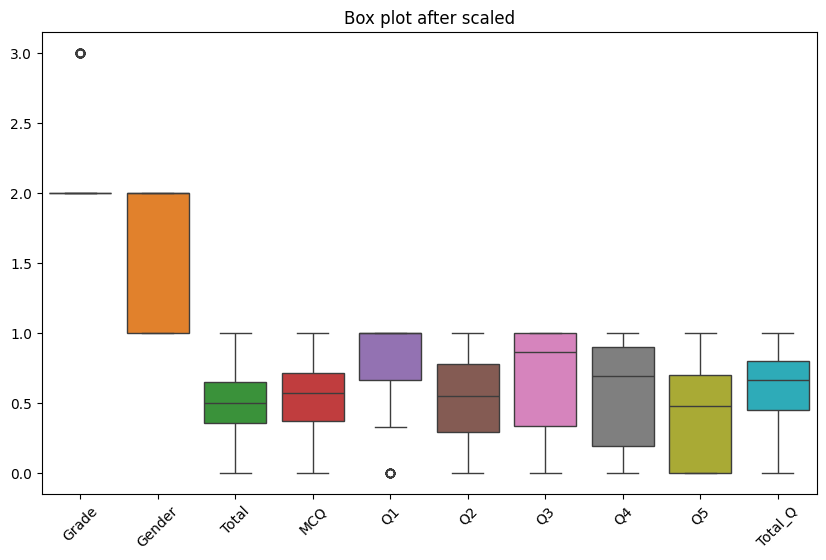

In [15]:
# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_f)
plt.title('Box plot after scaled')
plt.xticks(rotation=45)
plt.show()

In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 假设 df 是你的DataFrame，并且它已经包含了你想要分析的数值特征
# # 计算特征之间的相关性矩阵
# correlation_matrix = df_f.corr()

# # 使用 Seaborn 绘制热力图
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# # 显示图表的标题
# plt.title('Feature Correlation Heatmap')

# # 显示图表
# plt.show()

In [17]:
# # df_f = df_f.drop(columns=['Total','Total_Q_Score','Grade','Gender'])
# explained_variance_ratios = []

# # 遍历特征数量
# for n_components in range(1, df_f.shape[1] + 1):
#     pca = PCA(n_components=n_components)
#     pca.fit(df_f)
#     explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
#     explained_variance_ratios.append(explained_variance_ratio)

# # 绘制特征数量与累积解释方差比的关系
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, df_f.shape[1] + 1), explained_variance_ratios, marker="o")
# plt.title('Cumulative Explained Variance by Number of Features')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

In [18]:
# 先用 PCA 降维
pca = PCA(n_components=6 ,svd_solver = 'full')  
pca_result = pca.fit_transform(df_f)
#print(pca.components_)
print(pca.explained_variance_ratio_)
# print(pca_result)

[0.36816655 0.24254196 0.0999577  0.07373143 0.06948004 0.05945444]


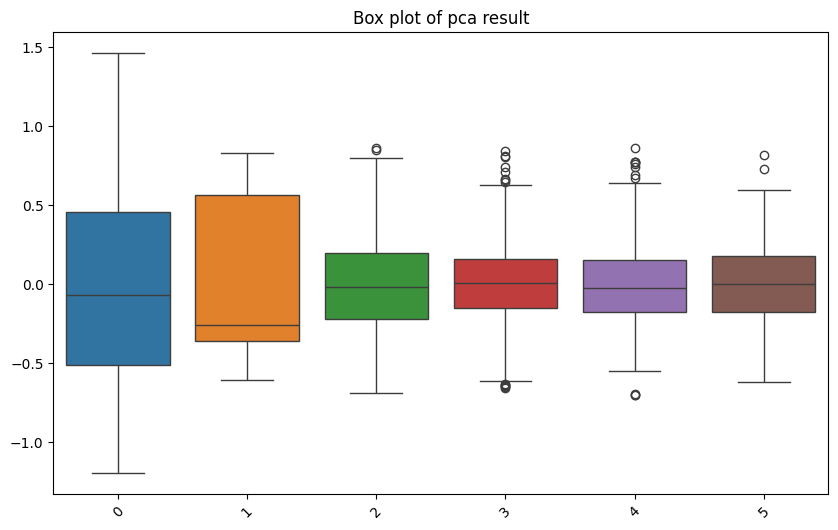

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pca_result)
plt.title('Box plot of pca result')
plt.xticks(rotation=45)
plt.show()

In [20]:
df_d = df_f

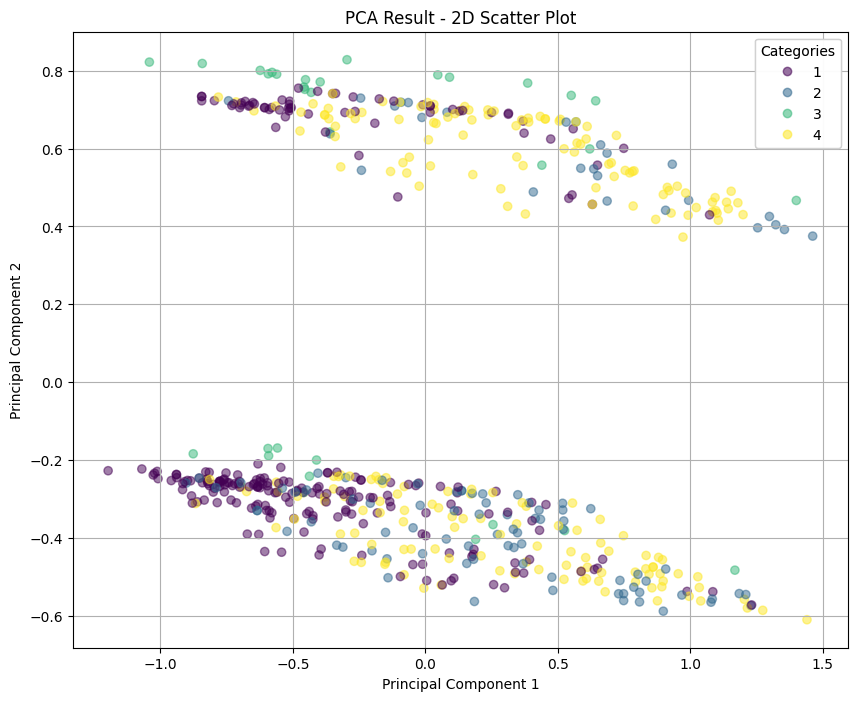

In [21]:

# 先执行PCA
pca = PCA(n_components=6)  # 选择2个主成分
pca_result = pca.fit_transform(df_d)
pca_one = pca_result[:, 0]
pca_two = pca_result[:, 1]
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_one, pca_two, c=categories, alpha=0.5)
plt.title('PCA Result - 2D Scatter Plot')
legend1 = plt.legend(*scatter.legend_elements(), title="Categories")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

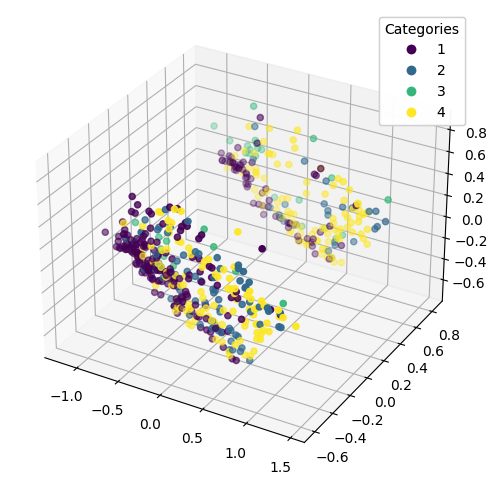

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Assuming 'df_f' is your dataframe and 'categories' is your array of labels for coloring

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_f)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with categories as color
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=categories, cmap='viridis')

# Create a legend for the colors
legend = ax.legend(*scatter.legend_elements(), title="Categories")
ax.add_artist(legend)

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# plt.title('3D PCA Results with Colors')

# # Show the plot
# plt.show()


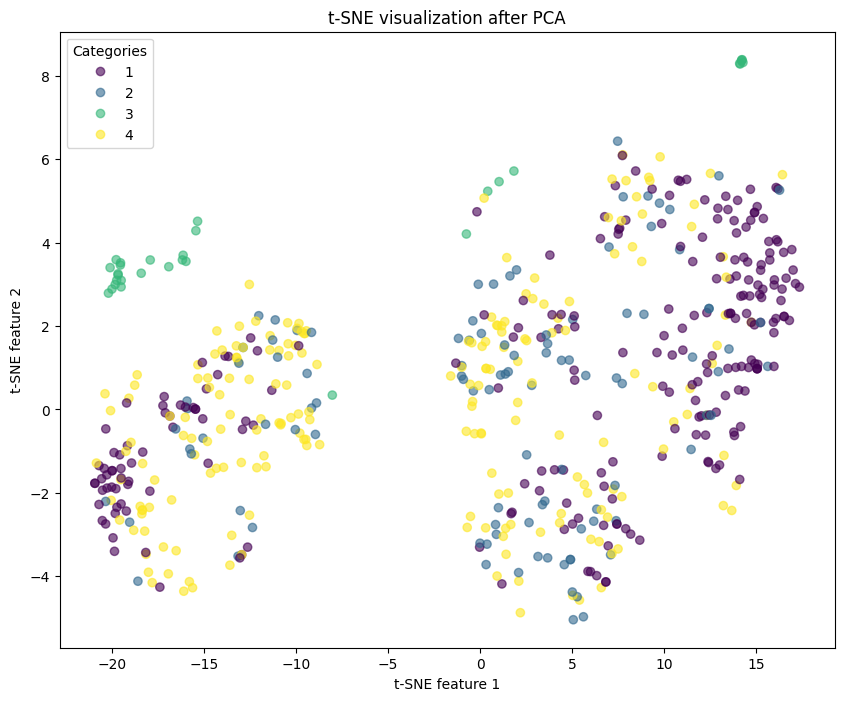

In [30]:
# 再用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity =80, learning_rate=160)
tsne_result = tsne.fit_transform(df_f)

# 可视化 t-SNE 结果
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=set(categories), title="Categories")
plt.title('t-SNE visualization after PCA')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

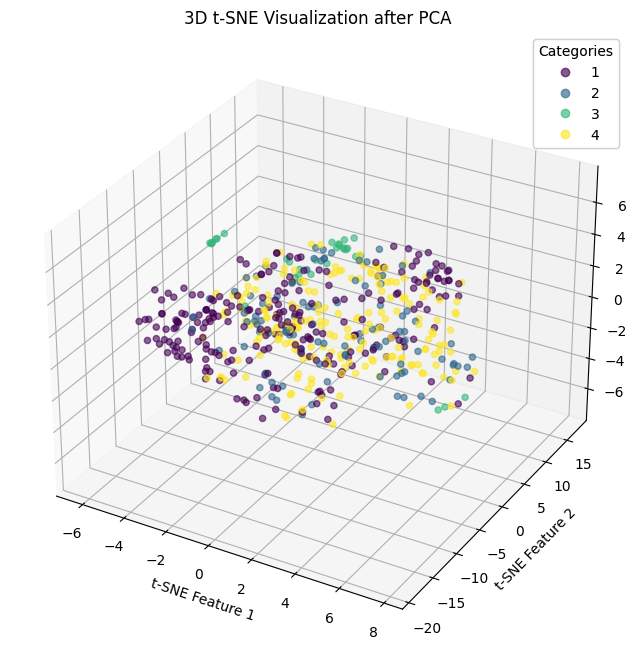

In [24]:
from mpl_toolkits.mplot3d import Axes3D  



# 使用 t-SNE 降维到3维
tsne = TSNE(n_components=3, random_state=42, perplexity=45, learning_rate=160)
tsne_result = tsne.fit_transform(df_f)

# 创建一个3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=categories, cmap='viridis', alpha=0.6)

# 创建图例
legend1 = ax.legend(*scatter.legend_elements(), title="Categories")
ax.add_artist(legend1)

# 设置坐标轴标签
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

# 设置图形标题
plt.title('3D t-SNE Visualization after PCA')

# 显示图形
plt.show()

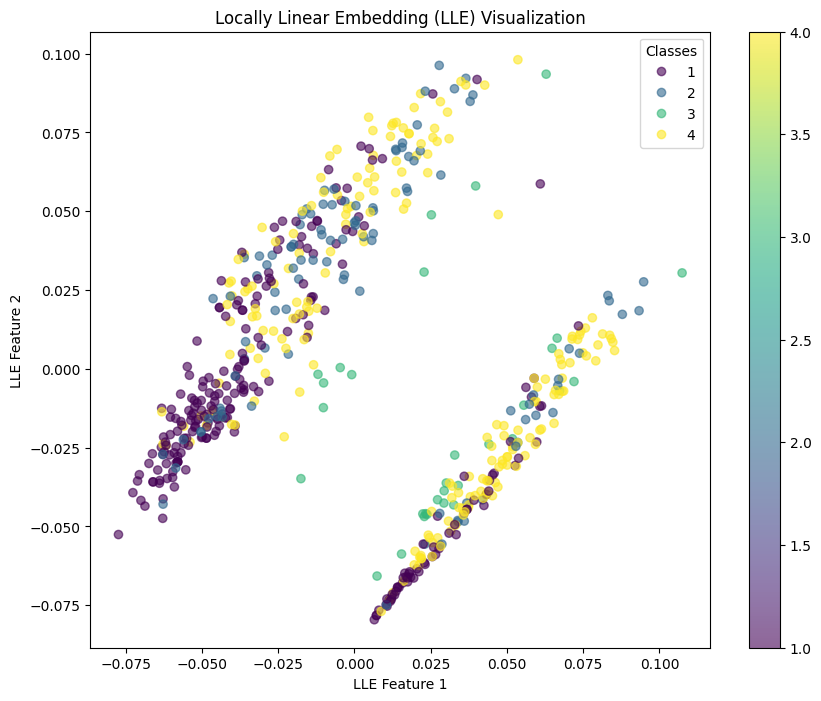

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 假设 'features' 是你的特征矩阵，'labels' 是对应的标签数组

# 实例化 LLE 对象
lle = LocallyLinearEmbedding(n_neighbors=90, n_components=3, method='standard')

# 使用 LLE 对特征进行降维
lle_result = lle.fit_transform(df_f)

# 可视化降维结果，假设 labels 包含了每个点的类别标签
plt.figure(figsize=(10, 8))
scatter = plt.scatter(lle_result[:, 0], lle_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
plt.colorbar()  # 显示颜色条

# 如果 labels 是数字类别，可以用下面的代码创建图例
if np.issubdtype(categories.dtype, np.integer):
    # 为每个类别生成图例
    plt.legend(*scatter.legend_elements(), title="Classes")

plt.xlabel('LLE Feature 1')
plt.ylabel('LLE Feature 2')
plt.title('Locally Linear Embedding (LLE) Visualization')

plt.show()

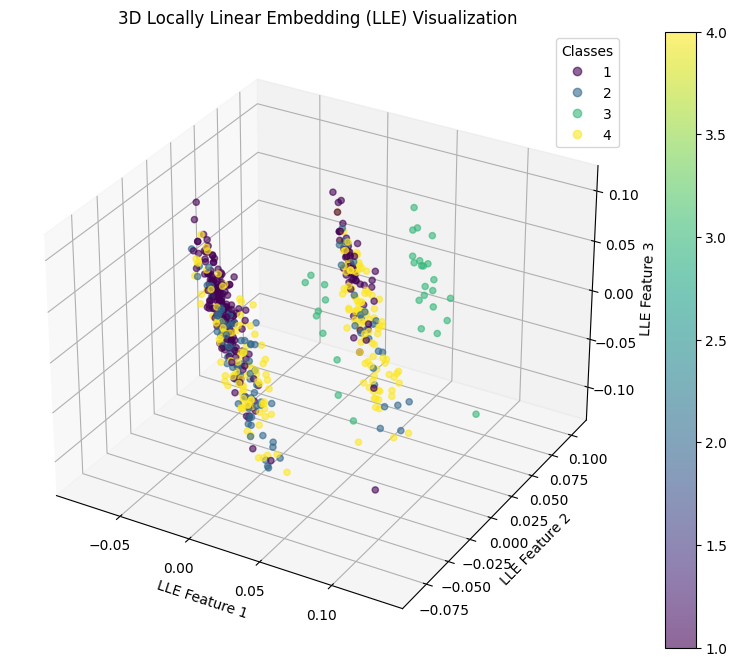

In [34]:
lle = LocallyLinearEmbedding(n_neighbors=130, n_components=3, method='standard')

# 使用 LLE 对 pca_result 进行降维
lle_result_3d = lle.fit_transform(df_f)

# 以下代码使用matplotlib创建一个3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 散点图中每个点的颜色由categories决定
sc = ax.scatter(lle_result_3d[:, 0], lle_result_3d[:, 1], lle_result_3d[:, 2], c=categories, cmap='viridis', alpha=0.6)

# 添加颜色条
plt.colorbar(sc)

# 如果categories是整数类型的标签，生成图例
if np.issubdtype(categories.dtype, np.integer):
    # 创建一个图例，并选择第一个散点作为图例的代表
    legend = ax.legend(*sc.legend_elements(), title="Classes")

# 设置坐标轴的标签
ax.set_xlabel('LLE Feature 1')
ax.set_ylabel('LLE Feature 2')
ax.set_zlabel('LLE Feature 3')

# 设置图标题
ax.set_title('3D Locally Linear Embedding (LLE) Visualization')

# 显示图形
plt.show()

D:\python\python3.11.2\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


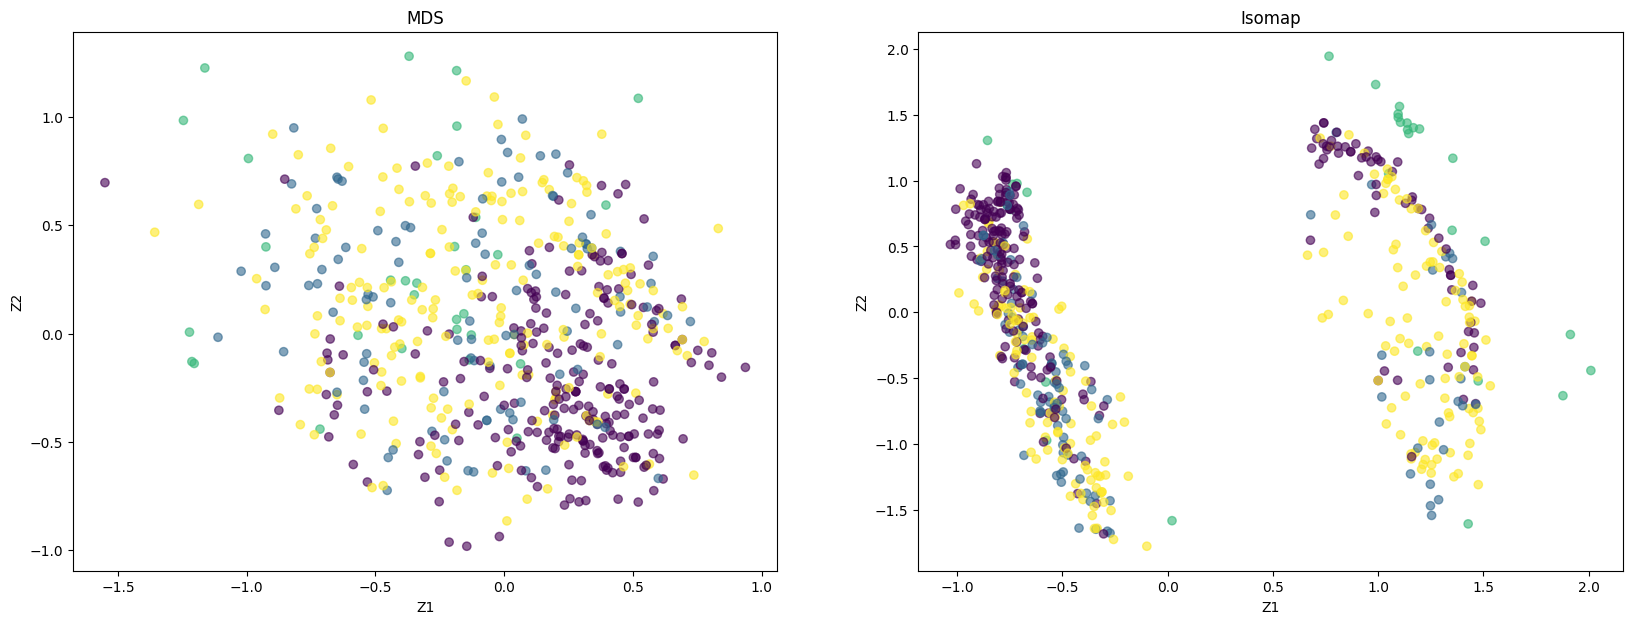

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import StandardScaler


# MDS
mds = MDS(n_components=4, random_state=42,metric = True)
mds_result = mds.fit_transform(df_f)

# Isomap
isomap = Isomap(n_components=2,n_neighbors = 80,eigen_solver = 'auto',path_method = 'auto',neighbors_algorithm ='auto')
isomap_result = isomap.fit_transform(df_f)


# 可视化代码
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# MDS
axes[0].scatter(mds_result[:, 0], mds_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
axes[0].set_title('MDS')

# Isomap
axes[1].scatter(isomap_result[:, 0], isomap_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
axes[1].set_title('Isomap')

# 设置坐标轴标题
for ax in axes:
    ax.set_xlabel('Z1')
    ax.set_ylabel('Z2')

# 显示图形
plt.show()

D:\python\python3.11.2\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


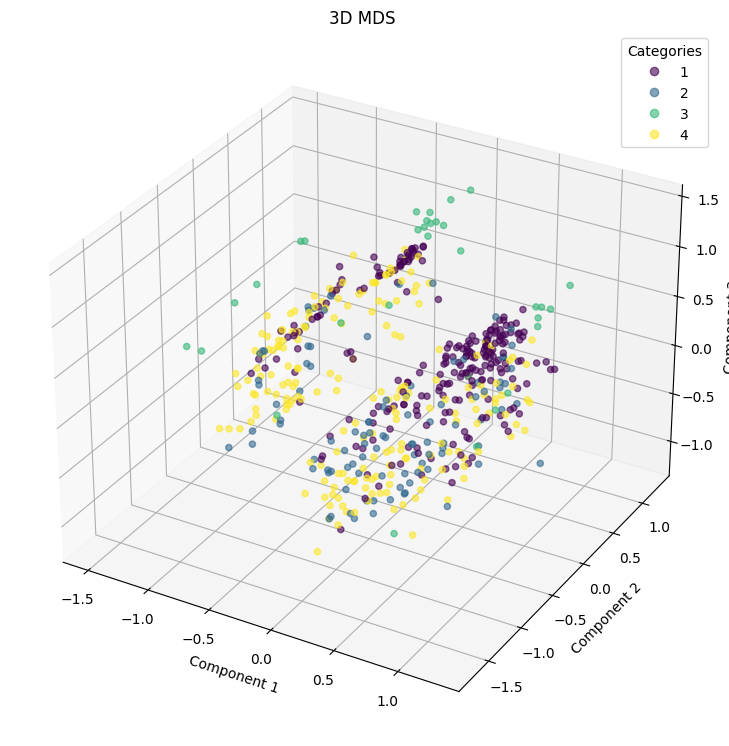

In [31]:
# MDS
mds = MDS(n_components=3, random_state=42, metric=True)
mds_result = mds.fit_transform(df_f)


# 绘制3D模型
fig = plt.figure(figsize=(20, 10))

# MDS 3D图
ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(mds_result[:, 0], mds_result[:, 1], mds_result[:, 2], c=categories, cmap='viridis', alpha=0.6)
ax1.set_title('3D MDS')
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
plt.legend(*sc.legend_elements(), title="Categories")

plt.show()

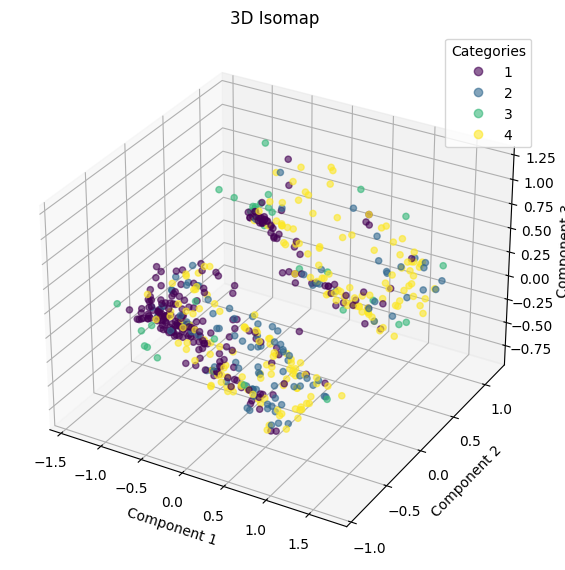

In [29]:
# Isomap
isomap = Isomap(n_components=8, n_neighbors =200, eigen_solver='auto', path_method='auto', neighbors_algorithm='auto')
isomap_result = isomap.fit_transform(df_f)
fig = plt.figure(figsize=(15, 7))
# Isomap 3D图
ax2 = fig.add_subplot(122, projection='3d')
sc = ax2.scatter(isomap_result[:, 0], isomap_result[:, 1], isomap_result[:, 2], c=categories, cmap='viridis', alpha=0.6)
ax2.set_title('3D Isomap')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')
plt.legend(*sc.legend_elements(), title="Categories")

# 显示图形
plt.show()